<a href="https://colab.research.google.com/github/Itzel-Pz/Clases-IA-URC/blob/main/Clasificaci%C3%B3n_de_un_candidato_a_un_empleo_itzel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
# importo NumPy para generar datos numéricos aleatorios y pandas para manejar el DataFrame


# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# aquí defino que quiero 5000 muestras (filas), o sea, 5000 "personas" o registros que voy a simular


# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# en esta línea genero 6 columnas de habilidades técnicas
# cada valor estará entre 70 y 100
# (5000 filas x 6 columnas)


# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# igual que arriba pero ahora son habilidades matemáticas
# estas van desde 60 hasta 90


# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# y aquí genero habilidades psicológicas
# que van desde 50 hasta 85


# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# aquí defino el nombre para cada columna que va a tener el DataFrame
# las primeras 6 son técnicas, las siguientes 6 matemáticas, las últimas 6 psicológicas


# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)
# concateno las 3 matrices (tec, mat, psi) horizontalmente usando axis=1
# esto me da una matriz de 5000 filas x 18 columnas
# y la convierto a DataFrame usando los nombres de columnas que definí arriba


In [11]:
# Calcular promedio por grupo y promedio total

prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
# aquí calculo el promedio de las habilidades tecnológicas para cada fila (cada persona)
# selecciono las 6 columnas tecnológicas y saco el .mean() por fila (axis=1)

prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
# aquí hago lo mismo pero con las habilidades matemáticas
# también son 6 columnas y saca el promedio por persona

prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# y aquí obtengo el promedio de las habilidades psicológicas para cada registro

# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# aquí combino los tres promedios y saco un promedio general por persona

# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# aquí estoy creando la etiqueta (target)
# si el promedio total es mayor que 75 lo marco como 1 (apto)
# si es 75 o menos lo marco como 0 (no apto)
# .astype(int) convierte True/False en 1/0

# one-hot encoding
y = pd.get_dummies(y).values
# convierto y a one-hot encoding para usarlo en redes neuronales
# por ejemplo:
# 0 -> [1,0]
# 1 -> [0,1]


In [12]:
from sklearn.model_selection import train_test_split
# importo la función train_test_split para separar mis datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)
# aquí separo mis datos:
# X son mis características (el DataFrame df)
# y son mis etiquetas (aptos / no aptos)
# test_size=0.2 significa que 20% de los datos serán para prueba y 80% para entrenamiento
# random_state=42 lo pongo para que la separación sea reproducible (que dé el mismo resultado cada vez)


# Escalamiento
from sklearn.preprocessing import StandardScaler
# importo el escalador estándar, que normaliza los datos

scaler = StandardScaler()
# creo el objeto escalador

X_train = scaler.fit_transform(X_train)
# ajusto el escalador usando sólo los datos de entrenamiento
# y transformo X_train para que quede normalizado

X_test = scaler.transform(X_test)
# aquí transformo X_test usando el mismo escalador
# IMPORTANTE: NO se vuelve a hacer fit con X_test, solo transform
# así evito fugas de información del test hacia el entrenamiento


In [13]:
from tensorflow.keras.models import Sequential
# importo el modelo secuencial de Keras, que me permite construir la red capa por capa

from tensorflow.keras.layers import Dense
# importo la capa Dense (capa densa totalmente conectada), que es el tipo de capa que voy a usar

from tensorflow.keras.optimizers import Adam
# importo el optimizador Adam, que es el que voy a usar para actualizar los pesos durante el entrenamiento


modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    # primera capa oculta con 64 neuronas
    # input_shape = número de características que tiene cada ejemplo
    # uso activación ReLU para permitir no linealidad

    Dense(32, activation='relu'),
    # segunda capa oculta con 32 neuronas, también con ReLU

    Dense(16, activation='relu'),
    # tercera capa oculta con 16 neuronas, también ReLU

    Dense(2, activation='softmax')
    # capa de salida con 2 neuronas
    # softmax porque tenemos clasificación en dos clases (0 y 1) usando one-hot
])


adam = Adam(learning_rate=0.001)
# aquí creo el optimizador Adam y le paso una tasa de aprendizaje de 0.001


modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# compilo el modelo: le digo qué optimizador usar
# 'categorical_crossentropy' es la función de pérdida para clasificación multiclase con one-hot
# y quiero medir 'accuracy', o sea, el porcentaje de aciertos


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = modelo.fit(
    X_train, y_train,
    # aquí le paso los datos de entrenamiento: X_train (características) y y_train (etiquetas)

    epochs=50,
    # entrenaré el modelo durante 50 épocas (50 pasadas completas por el dataset)

    batch_size=8,
    # el modelo va a actualizar los pesos cada 8 muestras
    # esto hace el entrenamiento más estable que batch_size=1 y más preciso que batch_size muy grande

    validation_data=(X_test, y_test),
    # le paso los datos de validación para que durante el entrenamiento me muestre cómo va
    # no se entrena con estos datos, solo sirven para evaluar el desempeño cada época

    verbose=1
    # verbose=1 significa que quiero ver el progreso de cada época en pantalla
)
# al final, lo que me devuelve fit() lo guardo en `history`
# esto contiene la evolución de loss y accuracy en entrenamiento y validación


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8231 - loss: 0.3881 - val_accuracy: 0.9470 - val_loss: 0.1129
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.0856 - val_accuracy: 0.9690 - val_loss: 0.0768
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0553 - val_accuracy: 0.9670 - val_loss: 0.0701
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0384 - val_accuracy: 0.9680 - val_loss: 0.0693
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9879 - loss: 0.0285 - val_accuracy: 0.9760 - val_loss: 0.0534
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9730 - val_loss: 0.0670
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0242 - val_accuracy: 0.9700 - val_loss: 0.0734
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0135 - val_accuracy: 0.

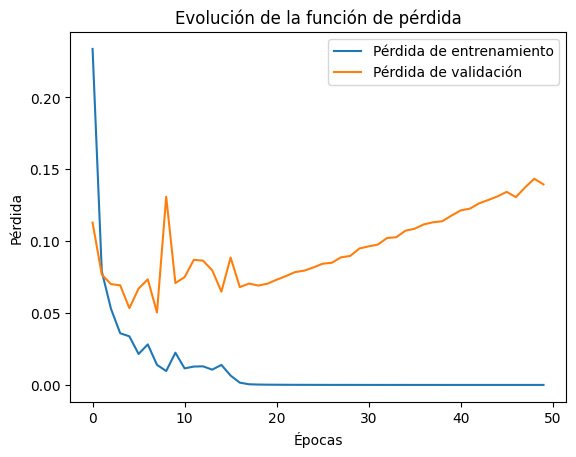

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.1264

🔹 Loss: 0.1395  |  Accuracy: 0.9830


In [15]:
import matplotlib.pyplot as plt
# importo matplotlib para poder graficar la evolución del entrenamiento


plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
# grafico la pérdida (loss) del conjunto de entrenamiento guardada en history

plt.plot(history.history['val_loss'], label='Pérdida de validación')
# grafico la pérdida del conjunto de validación para compararla con el entrenamiento


plt.xlabel('Épocas')
# le pongo nombre al eje X (cada punto es una época)

plt.ylabel('Pérdida')
# le pongo nombre al eje Y (los valores de la función de pérdida)

plt.legend()
# activo la leyenda para distinguir las 2 curvas: entrenamiento vs validación

plt.title('Evolución de la función de pérdida')
# le doy título a la gráfica

plt.show()
# muestro la gráfica en pantalla


loss, acc = modelo.evaluate(X_test, y_test)
# aquí evalúo el modelo final usando los datos de prueba (datos que no vio durante el entrenamiento)
# evaluate regresa la pérdida y la exactitud (accuracy)

print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")
# imprimo en pantalla la pérdida y la exactitud, con 4 decimales de precisión


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


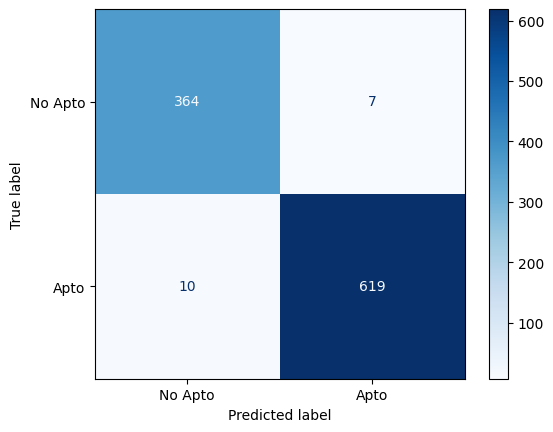


Sensitivity (Recall) por clase:
No Apto: 0.98
Apto: 0.98


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
# importo las funciones para calcular la matriz de confusión y el recall (sensibilidad)


pred = modelo.predict(X_test)
# hago predicciones con el modelo usando los datos de prueba
# esto devuelve probabilidades para cada clase

y_pred = np.argmax(pred, axis=1)
# aquí convierto las probabilidades en la clase predicha (0 o 1)
# argmax() me da el índice de la neurona con mayor probabilidad

y_true = np.argmax(y_test, axis=1)
# convierto las etiquetas reales (que están en one-hot) a clase numérica 0 o 1


cm = confusion_matrix(y_true, y_pred)
# calculo la matriz de confusión comparando clases reales vs predichas

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
# preparo el objeto para visualizar la matriz, y le doy etiquetas a cada clase

disp.plot(cmap='Blues')
# grafico la matriz de confusión como una imagen en tonos azules

plt.show()
# muestro la imagen


sensitivity = recall_score(y_true, y_pred, average=None)
# calculo la sensibilidad (recall) para cada clase por separado
# recall = casos positivos correctamente detectados / casos positivos totales

print("\nSensitivity (Recall) por clase:")
# imprimo el encabezado

print(f"No Apto: {sensitivity[0]:.2f}")
# imprimo recall para la clase 0 (No Apto)

print(f"Apto: {sensitivity[1]:.2f}")
# imprimo recall para la clase 1 (Apto)


In [17]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas
# aquí creo un nuevo "alumno / persona" con sus puntajes en cada una de las 18 habilidades
# es un arreglo de 1 fila x 18 columnas, respetando el orden original de columnas


nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
# IMPORTANTÍSIMO: antes de predecir lo escalo usando el mismo scaler
# debe estar en la misma escala que los datos con los que entrené el modelo


pred_nuevo = modelo.predict(nuevo_candidato_scaled)
# aquí hago la predicción con el modelo, esto devuelve probabilidades:
# algo como [0.15, 0.85] → significa mayor probabilidad de ser "Apto"


clase_predicha = np.argmax(pred_nuevo)
# convierto las probabilidades a clase (0 o 1)
# si la segunda posición es mayor, será 1 = "Apto"


print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")
# imprimo el resultado final:
# si clase_predicha == 1 → muestro "Apto"
# si clase_predicha == 0 → "No Apto"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Evaluación de nuevo candidato:
Resultado: Apto


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
